## Final Project Submission

Please fill out:
* Student Name: Sharon Chebet
* Student Pace: Part-time 
* Scheduled Project Review Date/Time: June 2024 
* Instructor Name: Samuel Karu 


# Overview

##  Business Understanding



### Objectives


Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Questions to consider 




* Which studio has the highest total gross 

* Which release date or periods yield the highest returns?


* How does production budget correlate with worldwide gross revenue?

* How does foreign gross correlates with domestic gross.



## Task 1 : Data Understanding.




Dataset
For this project  We will consider the following datasets:

*bom_movies bom.movie_gross.csv 

*tmdb_movies tmdb.movies.csv' 

*rt_movies rt.movie_info.tsv

*tn_movies tn_movies_df

After  initial Analysis i have noted that tmdb movies and rt_movies have insufficient information  and dropping them wont affect the results. For this reason we will focus on the following datasets in our analysis <b>bom_movies</b>  and <b>tn_movies</b>. 




Dataset Overview

The dataset includes the following columns:

<b>*movie/title:</b> The title of the movie.

<b>*releasedate:</b> The date when the movie was released.

<b>*production_budget:</b> The amount of money spent on producing the movie.

<b>*domestic_gross:</b> The revenue generated from domestic box office sales.

<b>*foreign_gross:</b> The revenue generated from foreign box office sales.

<b>*worldwide_gross:</b> The total revenue generated from both domestic and international box office sales.


## Import relevant libraries

In [32]:
import pandas as pd
import numpy as np
from numbers import Number
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 1.1) Read  the datasets into a pandas DataFrame

In [33]:
## Read `bom_movie.csv` into a pandas DataFrame named `df`
bom_movie_df= pd.read_csv('Data/bom.movie_gross.csv')
bom_movie_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [34]:
###  Read `tmdb_movies.csv` into a pandas DataFrame named tmdb_movies_df
tmdb_movies_df= pd.read_csv('Data/tmdb.movies.csv')
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [35]:
# Read `Data/tn.movie_budgets.csv` into a pandas DataFrame named tn_movies_df
tn_movies_df= pd.read_csv('Data/tn.movie_budgets.csv')
tn_movies_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [36]:
# Read `Data/tn.movie_budgets.csv` into a pandas DataFrame named rt_movies_df
rt_movies= np.loadtxt('Data/rt.movie_info.tsv', delimiter='\t', dtype=str)
print(rt_movies)

[['id' 'synopsis' 'rating' ... 'box_office' 'runtime' 'studio']
 ['1'
  '"This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy ""Popeye"" Doyle (Hackman) and his partner, Buddy Russo (Roy Scheider), are New York City police detectives on narcotics detail, trying to track down the source of heroin from Europe into the United States. Suave Alain Charnier (Fernando Rey) is the French drug kingpin who provides a large percentage of New York City\'s dope, and Pierre Nicoli (Marcel Bozzuffi) is a hired killer and Charnier\'s right-hand man. Acting on a hunch, Popeye and Buddy start tailing Sal Boca (Tony Lo Bianco) and his wife, Angie (Arlene Faber), who live pretty high for a couple whose corner store brings in about 7,000 dollars a year. It turns out Popeye\'s suspicions are right -- Sal and Angie are the New York agents for Charnier, who will be smu

In [37]:
rt_movies_df = pd.read_csv('Data/rt.movie_info.tsv', sep='\t')
rt_movies_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


### Exploratory Data Analysis (EDA)
* bom_movie _df

In [38]:
# lets get a concise summary of the bom_movies
bom_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### Dealing  with null values

For domestic gross and foreign gross we will replace the null values with 0 as the null values indicate that the movie was not sold domestically or abroad respectively.

In [39]:
# fill the null values
bom_movie_df['domestic_gross'].fillna(0,inplace =True)
bom_movie_df['foreign_gross'].fillna(0,inplace =True)
# check for missing values
bom_movie_df.isna().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### Add new column  total_gross which is the sum of domestic goss and foreign gross

In [40]:
# Convert 'Domestic Gross' and 'Foreign Gross' to numeric, handling errors
bom_movie_df['domestic_gross'] = pd.to_numeric(bom_movie_df['domestic_gross'], errors='coerce')
bom_movie_df['foreign_gross'] = pd.to_numeric(bom_movie_df['foreign_gross'], errors='coerce')
# Calculate total gross
bom_movie_df['total_gross'] = bom_movie_df['domestic_gross'] + bom_movie_df['foreign_gross']
bom_movie_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [41]:
bom_movie_df.describe()

,domestic_gross,foreign_gross,year,total_gross
count,3.387000e+03,3.382000e+03,3387.000000,3.382000e+03
mean,2.850821e+07,4.509637e+07,2013.958075,7.280497e+07
std,6.675575e+07,1.127543e+08,2.478141,1.692869e+08
min,0.000000e+00,0.000000e+00,2010.000000,1.000000e+02
25%,1.115000e+05,0.000000e+00,2012.000000,2.725000e+05
50%,1.300000e+06,1.500000e+06,2014.000000,5.449000e+06
75%,2.750000e+07,2.920000e+07,2016.000000,6.097500e+07
max,9.367000e+08,9.605000e+08,2018.000000,1.518900e+09


### Display top 10 films by total gross

In [42]:
# Display top 10 films by total gross
top_films = bom_movie_df.sort_values(by='total_gross', ascending=False).head(10)
print("Top 10 Films by Total Gross:")
print(top_films[['title', 'studio', 'total_gross']])

Top 10 Films by Total Gross:
                                            title studio   total_gross
727                         Marvel's The Avengers     BV  1.518900e+09
1875                      Avengers: Age of Ultron     BV  1.405400e+09
3080                                Black Panther     BV  1.347000e+09
328   Harry Potter and the Deathly Hallows Part 2     WB  1.341500e+09
2758                     Star Wars: The Last Jedi     BV  1.332600e+09
3081               Jurassic World: Fallen Kingdom   Uni.  1.309500e+09
1127                                       Frozen     BV  1.276400e+09
2759                  Beauty and the Beast (2017)     BV  1.263500e+09
3082                                Incredibles 2     BV  1.242800e+09
1128                                   Iron Man 3     BV  1.214800e+09


### Calculate average gross for domestic and foreign markets

In [43]:
# Calculate average gross for domestic and foreign markets
avg_domestic_gross = bom_movie_df['domestic_gross'].mean()
avg_foreign_gross = bom_movie_df['foreign_gross'].mean()

print("\nAverage Domestic Gross:", avg_domestic_gross)
print("Average Foreign Gross:", avg_foreign_gross)


Average Domestic Gross: 28508205.958074994
Average Foreign Gross: 45096365.63660556


### Determine which studio has the highest total gros

In [44]:
# Determine which studio has the highest total gross
top_studio = bom_movie_df.groupby('studio')['total_gross'].sum().idxmax()
print("\nStudio with Highest Total Gross:", top_studio)


Studio with Highest Total Gross: BV


### trend over years

In [45]:
# trend over years
yearly_average_gross = bom_movie_df.groupby('year')[['domestic_gross', 'foreign_gross']].mean()

print("\nYearly Average Gross:")
print(yearly_average_gross)


Yearly Average Gross:
      domestic_gross  foreign_gross
year                               
2010    3.096624e+07   4.382396e+07
2011    2.522345e+07   3.927565e+07
2012    2.719151e+07   4.259472e+07
2013    3.083523e+07   4.746398e+07
2014    2.617149e+07   4.296701e+07
2015    2.455868e+07   3.401332e+07
2016    2.581113e+07   4.385101e+07
2017    3.406002e+07   6.265916e+07
2018    3.601042e+07   5.692016e+07


### Exploratory Data Analysis (EDA)

#tn_movies_df



In [46]:
#reading the first five rows of the tn_movies
tn_movies_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [47]:
tn_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [48]:

# check for missing values
tn_movies_df.isna().sum()




id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [49]:
# Remove non-numeric characters (e.g., dollar signs) from the production_budget, domestic_gross,and world wide gross  columns
tn_movies_df['production_budget'] = tn_movies_df['production_budget'].replace('[\$,]', '', regex=True)

tn_movies_df['domestic_gross'] = tn_movies_df['domestic_gross'].replace('[\$,]', '', regex=True)

tn_movies_df['worldwide_gross'] = tn_movies_df['worldwide_gross'].replace('[\$,]', '', regex=True)



In [50]:
# Convert the production_budget, domestic_gross,and world wide gross  columns to integers
tn_movies_df['production_budget'] = pd.to_numeric(tn_movies_df['production_budget'], errors='coerce').astype('Int64')
tn_movies_df['domestic_gross'] = pd.to_numeric(tn_movies_df['domestic_gross'], errors='coerce').astype('Int64')
tn_movies_df['worldwide_gross'] = pd.to_numeric(tn_movies_df['worldwide_gross'], errors='coerce').astype('Int64')

In [51]:
# summary statistics
tn_movies_df.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [52]:
#Top-Grossing Movies Analysis
# Identify top 10 highest-grossing movies
top_grossing = tn_movies_df.nlargest(10, 'worldwide_gross')
print(top_grossing)

     id release_date                                          movie  \
0     1    18-Dec-09                                         Avatar   
42   43    19-Dec-97                                        Titanic   
5     6    18-Dec-15           Star Wars Ep. VII: The Force Awakens   
6     7    27-Apr-18                         Avengers: Infinity War   
33   34    12-Jun-15                                 Jurassic World   
66   67     3-Apr-15                                      Furious 7   
26   27     4-May-12                                   The Avengers   
3     4     1-May-15                        Avengers: Age of Ultron   
41   42    16-Feb-18                                  Black Panther   
260  61    15-Jul-11  Harry Potter and the Deathly Hallows: Part II   

     production_budget  domestic_gross  worldwide_gross  
0            425000000       760507625       2776345279  
42           200000000       659363944       2208208395  
5            306000000       936662225      

In [53]:
# Merge the datasets on a common column (e.g., movie title)
#merged_df = pd.merge(bom_movie, tn_movies[['movie', 'title']], left_on='title', right_on='movie', how='left')
# Merging data set will have no significance difference as tn movies have the same records as bom movies for that reason we will do the analysis separately

# Data Vizualization

### Trend Over years

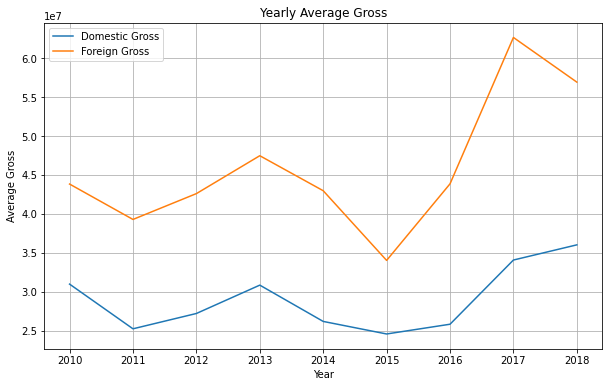

In [54]:
# Line plot of yearly average gross
plt.figure(figsize=(10, 6))
plt.plot(yearly_average_gross.index, yearly_average_gross['domestic_gross'], label='Domestic Gross')
plt.plot(yearly_average_gross.index, yearly_average_gross['foreign_gross'], label='Foreign Gross')
plt.xlabel('Year')
plt.ylabel('Average Gross')
plt.title('Yearly Average Gross')
plt.legend()
plt.grid(True)
plt.show()

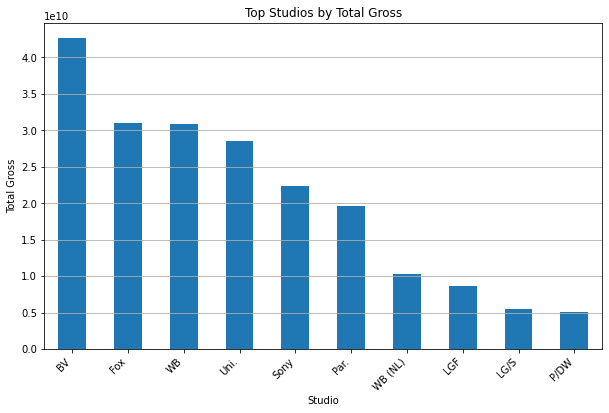

In [55]:
# Bar plot of top studios by total gross
top_studio_gross =bom_movie_df.groupby('studio')['total_gross'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_studio_gross.plot(kind='bar')
plt.xlabel('Studio')
plt.ylabel('Total Gross')
plt.title('Top Studios by Total Gross')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

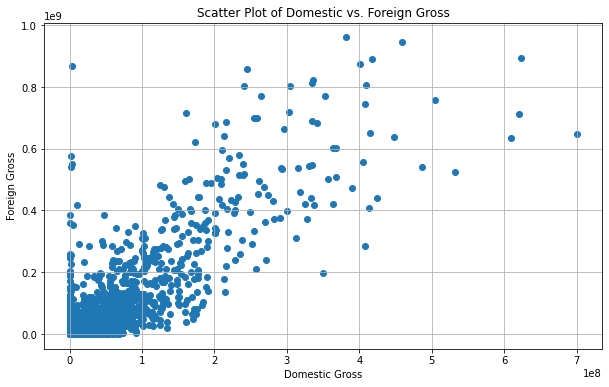

                domestic_gross  foreign_gross
domestic_gross        1.000000       0.848879
foreign_gross         0.848879       1.000000


In [56]:
# Scatter plot of domestic vs. foreign gross
plt.figure(figsize=(10, 6))
plt.scatter(bom_movie_df['domestic_gross'], bom_movie_df['foreign_gross'])
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.title('Scatter Plot of Domestic vs. Foreign Gross')
plt.grid(True)
plt.show()

# Calculate correlation
correlation = bom_movie_df[['domestic_gross', 'foreign_gross']].corr()
print(correlation)

### Data visualization tn_movies_df

Release date Analysis

release_month
1     4.656382e+07
2     7.154453e+07
3     8.063337e+07
4     5.992026e+07
5     1.622680e+08
6     1.425230e+08
7     1.409636e+08
8     6.097841e+07
9     4.669369e+07
10    4.946456e+07
11    1.357416e+08
12    1.016932e+08
Name: worldwide_gross, dtype: float64


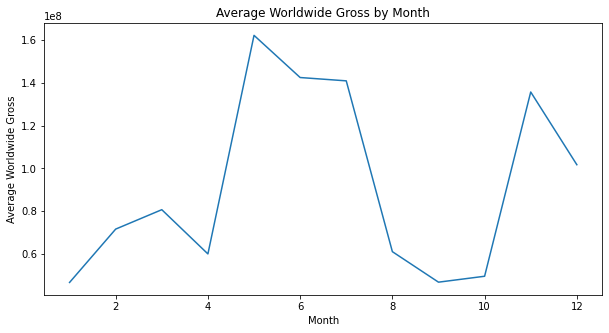

In [57]:
# Convert releasedate to datetime
tn_movies_df['release_date'] = pd.to_datetime(tn_movies_df['release_date'])# Extract month and year from release date

tn_movies_df['release_month'] = tn_movies_df['release_date'].dt.month
tn_movies_df['release_year'] = tn_movies_df['release_date'].dt.year

# Average worldwide gross by month
month_stats = tn_movies_df.groupby('release_month')['worldwide_gross'].mean()
print(month_stats)

# Line plot for average worldwide gross by month
plt.figure(figsize=(10, 5))
sns.lineplot(x=month_stats.index, y=month_stats.values)
plt.title('Average Worldwide Gross by Month')
plt.ylabel('Average Worldwide Gross')
plt.xlabel('Month')
plt.show()

# Average worldwide gross by year
#year_stats = tn_movies_df.groupby('release_year')['worldwide_gross'].mean()
#print(year_stats)

# Line plot for average worldwide gross by year
#plt.figure(figsize=(10, 5))
#sns.lineplot(x=year_stats.index, y=year_stats.values)
#plt.title('Average Worldwide Gross by Year')
#plt.ylabel('Average Worldwide Gross')
#plt.xlabel('Year')
#plt.show()

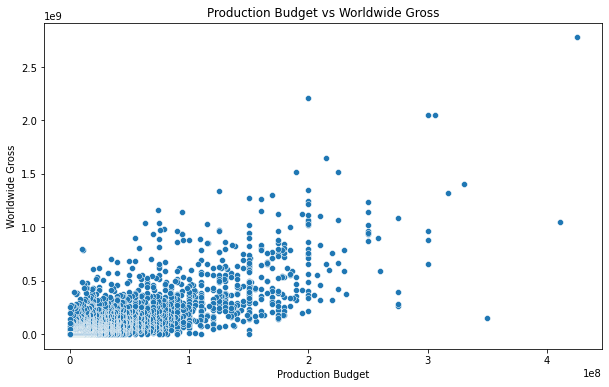

                   production_budget  worldwide_gross
production_budget           1.000000         0.748306
worldwide_gross             0.748306         1.000000


In [58]:
##Budget vs. Revenue Analysis
# Scatter plot for budget vs worldwide gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tn_movies_df['production_budget'], y=tn_movies_df['worldwide_gross'])
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()

# Calculate correlation
correlation = tn_movies_df[['production_budget', 'worldwide_gross']].corr()
print(correlation)

In [59]:
## Top-Grossing Movies Analysis

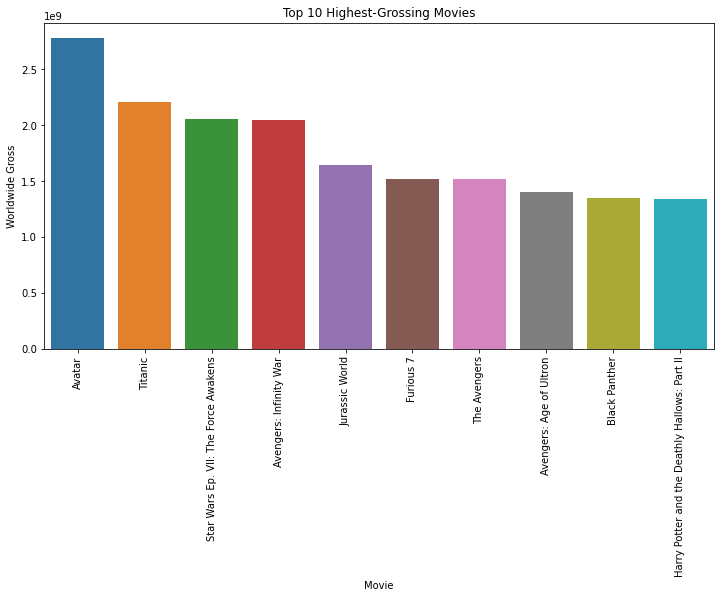

In [60]:
#Top-Grossing Movies Analysis
# Identify top 10 highest-grossing movies
#top_grossing = tn_movies_df.nlargest(10, 'worldwide_gross')
#print(top_grossing)

# Plot the top 10 highest-grossing movies
plt.figure(figsize=(12, 6))
sns.barplot(x=top_grossing['movie'], y=top_grossing['worldwide_gross'])
plt.xticks(rotation=90)
plt.title('Top 10 Highest-Grossing Movies')
plt.ylabel('Worldwide Gross')
plt.xlabel('Movie')
plt.show()

## Recommendation

<b>Partnership Opportunities:</b>

* Collaborate with BV Studio As BV studio is the leading studio with the highest grossing films, they could be a valuable partner. Collaborating with or hiring talent from this studio can provide invaluable industry insights and significantly boost credibility.

*  Leverage BV studio's industry experience to understand best practices in film production, marketing strategies, and audience engagement.

 <b>Market Adaptation:</b>
 
Foreign markets are showing increasing trends,  therefore microsoft should consider producing more movies geared towards the  foreign market. They should  invest in multilingual marketing and subtitles/dubbing to maximize reach.


<b> Strategic Release Dates </b>

* Schedule film releases in months that show higher average worldwide gross. For instance, plan major releases in April, May, October, and November to take advantage of these peak seasons.

* Focus on releasing major films during these high-grossing periods to capitalize on increased audience availability and maximize box office returns.

<b> Budget Optimization:</b>

 Given the positive correlation between production budget and worldwide gross, allocate sufficient budget to production to ensure high-quality outputs. However, balance the budget to avoid excessive spending that doesn't proportionately increase gross.

<b>  Global Market Strategy: </b>

Since there is a positive correlation between domestic and foreign gross, create a global marketing strategy that targets both domestic and international audiences. This could involve international premieres, global advertising campaigns, and engaging with global fan communities.


